In [240]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [241]:

def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums =[210605,210612,210619,210626,210703,210710,210717,210724,210731,210807,210814,210821,210828]
mta= get_data(week_nums)

In [242]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418


In [243]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [244]:
mta.columns = [columns.strip() for columns in mta.columns]
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [245]:
mta = mta[mta.DESC != 'RECOVR AUD']
mta= mta[mta.TIME != '04:01:13']
(mta
 .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME',])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,05/29/2021,00:00:00,1
1806964,R138,R293,00-03-01,34 ST-PENN STA,06/11/2021,10:00:00,1
1806966,R138,R293,00-03-01,34 ST-PENN STA,06/11/2021,18:00:00,1
1806967,R138,R293,00-03-01,34 ST-PENN STA,06/11/2021,22:00:00,1
1806968,R138,R293,00-03-01,34 ST-PENN STA,06/12/2021,02:00:00,1


In [246]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418


In [247]:
mta['DATETIME'] = pd.to_datetime(mta.DATE + ' ' + mta.TIME)


In [248]:
mta= mta.set_index(['DATETIME'])


In [249]:
morning = mta.between_time('04:00:00', '12:00:00')
morning.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
DATETIME,,,,,,,,,,,
2021-05-29 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2021-05-29 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
2021-05-29 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
2021-05-30 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,04:00:00,REGULAR,7579084,2590452
2021-05-30 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,08:00:00,REGULAR,7579085,2590454


In [250]:
#afternoon = afternoon.drop(["ENTRIES", "DESC"], axis=1, errors="ignore")

In [251]:
# subtract max from min for each turnstile to get exits
morning_turn = (morning.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['EXITS'].max()\
           -morning.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['EXITS'].min()).reset_index()

In [252]:
morning_turn['EXITS'].describe()


count    4.533900e+05
mean     3.362416e+03
std      1.782417e+06
min      0.000000e+00
25%      1.100000e+01
50%      4.900000e+01
75%      1.330000e+02
max      1.169855e+09
Name: EXITS, dtype: float64

In [253]:
morning_turn['EXITS'].sort_values(ascending = True).tail(30)

263439         26427
258559         26536
258565         26860
258569         27188
278530         41352
258549         41388
278235         64070
260293         73250
327092         78296
262938         80308
273037         87395
280711         94199
281469        191680
278842        202459
278186        229494
267106        284472
278216        333039
257784        370216
258595        399699
271895        500607
218853        547709
221562        767313
260014        983898
159971       1502417
27664        1653826
411626       4596317
431417      11825759
159473      14090261
74371      267390118
167245    1169855401
Name: EXITS, dtype: int64

In [254]:
morning_turn = morning_turn[morning_turn.EXITS <= 11000]

In [255]:
morning_turn.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,05/29/2021,59
1,A002,R051,02-00-00,59 ST,05/30/2021,41
2,A002,R051,02-00-00,59 ST,05/31/2021,53
3,A002,R051,02-00-00,59 ST,06/01/2021,186
4,A002,R051,02-00-00,59 ST,06/02/2021,189


In [256]:
morning_station = morning_turn.groupby(['STATION', 'DATE']).sum().reset_index()
morning_station['DATE'] = pd.to_datetime(morning_station['DATE'])
morning_station.head()

,STATION,DATE,EXITS
0,1 AV,2021-05-29,2130
1,1 AV,2021-05-30,1584
2,1 AV,2021-05-31,2011
3,1 AV,2021-06-01,5126
4,1 AV,2021-06-02,4992


In [257]:
morning_months = morning_station.groupby(['STATION'])['EXITS'].sum().reset_index()
morning_months.head()

,STATION,EXITS
0,1 AV,369893
1,103 ST,188205
2,103 ST-CORONA,144037
3,104 ST,17394
4,110 ST,146254


<AxesSubplot:title={'center':'Afternoon Exits by Station For Three months'}, xlabel='STATION'>

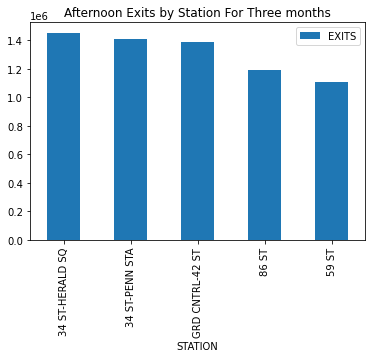

In [258]:
topsts = morning_months.sort_values('EXITS', ascending=False).head(5)
topsts.head()
topsts.plot(x='STATION',y='EXITS',kind='bar', title='Afternoon Exits by Station For Three months')

In [259]:
morning_turn = (morning.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['ENTRIES'].max()\
           -morning.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['ENTRIES'].min()).reset_index()

In [260]:
morning_turn['ENTRIES'].describe()


count    4.533900e+05
mean     2.417784e+03
std      1.034848e+06
min      0.000000e+00
25%      9.000000e+00
50%      4.700000e+01
75%      1.340000e+02
max      6.684988e+08
Name: ENTRIES, dtype: float64

In [261]:
morning_turn['ENTRIES'].sort_values(ascending = True).tail(30)

258569        49974
262938        51887
260293        64063
167617        65507
258549        68351
280916        82743
269084       101805
257784       113937
263439       117383
281469       118843
280711       126775
395515       131043
266688       182617
91259        196609
260014       312899
327092       364127
273037       421457
218853       629187
27664        765788
286702      1114110
159971      1198434
411626      5043347
221562      6214017
431417     11851510
159473     12517454
251846     36880390
155769     67109617
155678     67109618
74371     167087795
167245    668498787
Name: ENTRIES, dtype: int64

In [262]:
morning_months = morning_turn.groupby(['STATION'])['ENTRIES'].sum().reset_index()
morning_months.head()

,STATION,ENTRIES
0,1 AV,148307
1,103 ST,162762
2,103 ST-CORONA,539814
3,104 ST,100894
4,110 ST,137615


<AxesSubplot:title={'center':'Afternoon Entries by Station For Three months'}, xlabel='STATION'>

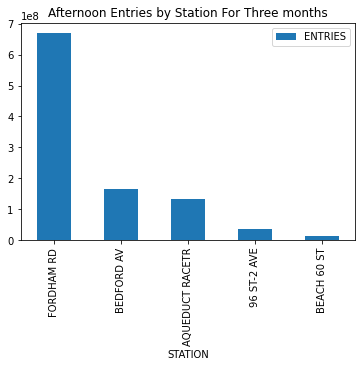

In [264]:
topsts = morning_months.sort_values('ENTRIES', ascending=False).head(5)
topsts.head()
topsts.plot(x='STATION',y='ENTRIES',kind='bar', title='Afternoon Entries by Station For Three months')